<a href="https://colab.research.google.com/github/CuongPham88888/code_AI/blob/main/robot_2_bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))
        array.append(np.array((i,j,x,y)))
    create_data.extend(array)
create_data

[array([ 0.,  0., 90.,  0.]),
 array([ 0.        ,  2.        , 89.97563308,  1.39597987]),
 array([ 0.        ,  4.        , 89.90256201,  2.79025895]),
 array([ 0.        ,  6.        , 89.78087581,  4.18113853]),
 array([ 0.        ,  8.        , 89.61072275,  5.56692404]),
 array([ 0.        , 10.        , 89.39231012,  6.94592711]),
 array([ 0.        , 12.        , 89.12590403,  8.31646763]),
 array([ 0.        , 14.        , 88.81182905,  9.67687582]),
 array([ 0.        , 16.        , 88.45046784, 11.02549423]),
 array([ 0.        , 18.        , 88.04226065, 12.36067977]),
 array([ 0.        , 20.        , 87.58770483, 13.68080573]),
 array([ 0.        , 22.        , 87.08735418, 14.98426374]),
 array([ 0.        , 24.        , 86.54181831, 16.26946572]),
 array([ 0.        , 26.        , 85.95176185, 17.53484587]),
 array([ 0.        , 28.        , 85.31790371, 18.77886251]),
 array([ 0.        , 30.        , 84.64101615, 20.        ]),
 array([ 0.        , 32.        , 83.921

In [ ]:
header = ['alpha', 'beta', 'x', 'y']
with open('robot_2d.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [ ]:
data=pd.read_csv('robot_2d.csv')
data

,alpha,beta,x,y
0,0.0,0.0,90.000000,0.000000
1,0.0,2.0,89.975633,1.395980
2,0.0,4.0,89.902562,2.790259
3,0.0,6.0,89.780876,4.181139
4,0.0,8.0,89.610723,5.566924
...,...,...,...,...
8995,178.0,190.0,-10.358819,7.311899
8996,178.0,192.0,-10.577231,8.690902
8997,178.0,194.0,-10.843637,10.061442
8998,178.0,196.0,-11.157712,11.421851


In [ ]:
x_data=np.array(data.drop(['alpha','beta'],axis=1))
y_data=np.array(data[['alpha','beta']])
x_data.shape

(9000, 2)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 11,402
Trainable params: 11,402
Non-traina

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/1000
33/33 [==============================] - 4s 8ms/step - loss: 9858.4863 - mean_absolute_error: 82.2092 - val_loss: 6526.6357 - val_mean_absolute_error: 64.6349
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 5971.6816 - mean_absolute_error: 57.6891 - val_loss: 5637.5967 - val_mean_absolute_error: 53.7638
Epoch 3/1000
33/33 [==============================] - 0s 4ms/step - loss: 5610.4937 - mean_absolute_error: 54.3526 - val_loss: 5435.2100 - val_mean_absolute_error: 53.4937
Epoch 4/1000
33/33 [==============================] - 0s 4ms/step - loss: 5454.7080 - mean_absolute_error: 53.1698 - val_loss: 5296.2305 - val_mean_absolute_error: 51.7918
Epoch 5/1000
33/33 [==============================] - 0s 4ms/step - loss: 5324.4595 - mean_absolute_error: 52.3040 - val_loss: 5178.1641 - val_mean_absolute_error: 50.7721
Epoch 6/1000
33/33 [==============================] - 0s 3ms/step - loss: 5196.2124 - mean_absolute_error: 51.5672 - val_loss: 5027.1675 - v

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 72.14098358154297
Test mae: 4.073999404907227


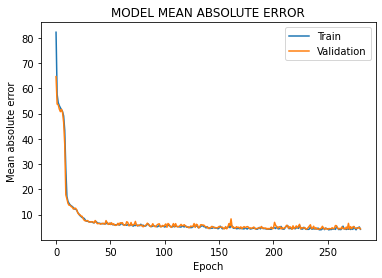

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[100]

array([35.428555, 91.89137 ], dtype=float32)

In [ ]:
y_test[100]

array([36., 92.])